<a href="https://colab.research.google.com/github/lexisantos/lintatpromptgamma/blob/main/HPGe_PGflux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import Activacion as act
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

##Paths generales

In [ ]:
#Espectros de fondo según detector y r_is
path_fondo = {'DF-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_fondo_rOFF_12.06.2025.txt",
              'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_fondo_rOFF_12.06.2025.txt",
              'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_fondo_rON_10.06.2025.txt",
              'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_fondo_rON_10.06.2025.txt"}

#Nombre de la fuente patrón
Fuente_pat = 'Eu152_76044A-440'

#Espectros de Eu en .txt
path_Eu152 = {'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_Eu152_76044A_sep3_rON_11.06.2025.txt",
              'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Eu152_76044A_3sep_rON_11.06.2025.txt",
              'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Eu152_76044A_3sep_rOFF_12.06.2025.txt"}

#Tablas de ROIs en .txt [E, inicio, fin]
path_Roical = {'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/ROI_cal_DF_Eu152_rON.txt",
               'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/ROI_cal_XC_Eu152_rON.txt",
               'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/ROI_cal_XC_Eu152_rOFF.txt"}

#Fuentes de Cs y Co según detector y r_is
fuente_Cs = {'DF-ON': 'Cs137_76072-440',
          'XC-ON': 'Cs137_76072-440',
          'XC-OFF': 'Cs137_76071-440'}

fuente_Co = {f:'Co60_76057-440' for f in ['DF-ON', 'XC-ON', 'XC-OFF']}

#Espectros de Cs=incog y Co=incog_Co en .txt
path_incog_1 = {'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_Cs137_76072_sep3_rON_11.06.2025.txt",
              'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Cs137_76072_3sep_rON_11.06.2025.txt",
              'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Cs137_76071_3sep_rOFF_12.06.2025.txt"}

ROIs_Cs = {'DF-ON': [1160, 1174],
          'XC-ON': [1108, 1122],
          'XC-OFF': [1109, 1121]}

path_incog_2 = {'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_Co60_76057_sep3_rON_11.06.2025.txt",
                 'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Co60_76057_3sep_rOFF_12.06.2025.txt",
                 'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Co60_76057_3sep_rON_11.06.2025.txt"}

ROIs_Co = {'DF-ON': np.array([[2370, 2388], [2082, 2100]]),
           'XC-ON': np.array([[1992, 2006], [2268, 2282]]),
           'XC-OFF': np.array([[1993, 2007], [2268, 2282]])}


In [ ]:
npicos = {'137Cs': 1, '60Co': 2}
for f in list(npicos.keys()):
		print(globals()[f'fuente_{f[-2:]}'])

{'DF-ON': 'Cs137_76072-440', 'XC-ON': 'Cs137_76072-440', 'XC-OFF': 'Cs137_76071-440'}
{'DF-ON': 'Co60_76057-440', 'XC-ON': 'Co60_76057-440', 'XC-OFF': 'Co60_76057-440'}


#DF-ON (Mn203/1 y Mn209/1)

In [ ]:
det = 'DF-ON'

## Fondo
Cargo el espectro del fondo correspondiente en '.txt'. Elijo con *det*.

In [ ]:
Fondo = act.fromspec(path_fondo[det])

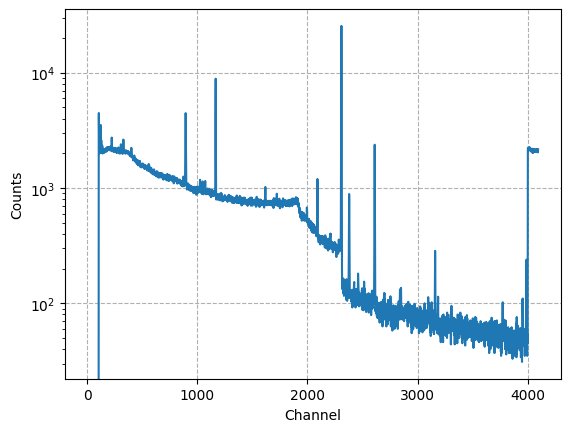

In [ ]:
plt.figure()
plt.plot(Fondo.channels, Fondo.counts)
plt.grid(True, ls='--')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.yscale('log')

## Eficiencia

Defino las direcciones para los espectros de Eu y las tablas con las ROIs.

In [ ]:
ROIs_cal = np.loadtxt(path_Roical[det]) #llamo a las ROIs definidas
spec_cal = act.fromspec(path_Eu152[det]) #recupero el espectro

In [ ]:
Fecha_cal = datetime.strptime(path_Eu152[det][-14:-4], '%d.%m.%Y') #día de la calibración. Puede definirse a mano, o cambiarse el formato de la fecha.
datos_cal = act.NAA_calib(Fuente_pat, Fecha_cal) #datos de la fuente pat - actividad, hl, espectro gamma (energy, intensity, unc_int)

Epeak_Eu = ROIs_cal[:, 0]
ROIs_cal = ROIs_cal[:, 1:].astype(int)

### Ajuste a curva de eficiencia

In [ ]:
grado_pol = 1 #grado de polinomio

eff_fit = datos_cal.cal_eff(ROIs_cal, spec_cal, Fondo, grado_pol, criterio = 0.003)

eff_data, err_eff, coef, coef_err, chi2, data_sel, residual, pvalor, ddof, rhos, var_mus = eff_fit #desglosamiento de resultados

coef_tabla = np.vstack((coef, coef_err)).T

Grafico los resultados

In [ ]:
E_arr = np.linspace(Epeak_Eu.min(), Epeak_Eu.max(), num=1000)
logE_arr  = np.log(E_arr)
eff_eval = np.polyval(coef, logE_arr) #eff evaluada con parámetros del ajuste
sigma_mu_est = np.sqrt(var_mus(logE_arr)) #raiz de la función varianza en función de ln(E)

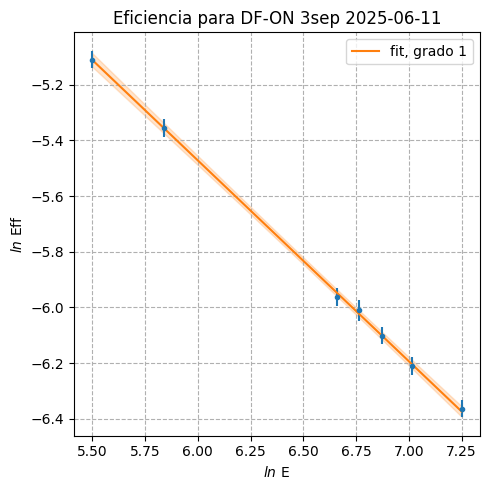

In [ ]:
plt.figure(1, figsize = (5,5))
plt.errorbar(np.log(Epeak_Eu), np.log(eff_data), yerr= err_eff/eff_data, fmt='.')
plt.plot(logE_arr, eff_eval, label = 'fit, grado {}'.format(grado_pol))
plt.fill_between(logE_arr, eff_eval-sigma_mu_est, eff_eval+sigma_mu_est, color='tab:orange', alpha=0.2)
plt.grid(True, ls = '--')
plt.ylabel('$ln$ Eff')
plt.xlabel('$ln$ E')
plt.legend()
plt.title('Eficiencia para ' + f'{det}'+ ' 3sep ' + f'{Fecha_cal.date()}')
plt.tight_layout()

### Reporte Eficiencia

In [ ]:
for jj in range(len(coef)):
    print(f'a{grado_pol-jj} = '+ ' '.join([*act.redondeo(coef[jj], coef_err[jj], 2, texto=True)]))
print(f'χ2 = {chi2}, ddof = {ddof}, p-value = {pvalor}.')#' \n Válido en E = ({Epeak_Eu.min().round(2)}-{Epeak_Eu.max().round(2)}) keV')

a1 = -0.721 ± 0.020
a0 = -1.15 ± 0.13
χ2 = 0.587207945319987, ddof = 5, p-value = 0.9885814379008866.


##Picos incógnita

###137Cs

Defino la **fuente incógnita** a considerar.

In [ ]:
iso = '137Cs'

Defino la fuente como un **alambre de composición 100% del radioisótopo**. Esto es para que sea una variable con las mismas funciones definidas (métodos) que las de un alambre.

In [ ]:
Comp_incog = {iso: 1}
Incog = act.Alambre(Comp_incog, 0)

Datos y **Tasa de Fondo** en la ROI del pico de interés.

In [ ]:
ROIs = ROIs_Cs[det]
Fondo_ROIs = {iso:Fondo.ROI(ROIs)}
cps_Fondo = {iso:np.array([Fondo_ROIs[iso][xx] for xx in ['net', 'net_err']])/Fondo.tlive}

**Espectro de la incógnita**, y datos en la ROI antes definida.

In [ ]:
spec_incog = act.fromspec(path_incog[det], coef_en = spec_cal.coef_en[::-1])
pico_incog = spec_incog.ROI(ROIs)
E_incog = pico_incog['en_max'] #energía del pico
t_inicio = spec_incog.tinicio.replace(hour=0, minute=0, second=0, microsecond=0) #Fecha de espectro '00 hs'

**Tasa neta de**l pico **incógnita** en la ROI.

In [ ]:
cps_pico = np.array([pico_incog['net'], pico_incog['net_err']])/spec_incog.tlive - cps_Fondo[iso]

Actividad calculada, actividad reportada, y la **diferencia relativa porcentual**.

In [ ]:
Act_incog, Act_RA3, diff, BR_incog = act.Actividad(np.array([E_incog]), np.array([cps_pico[0]]), np.array([cps_pico[1]]),
                          spec_incog.treal, coef_tabla, isfromRA3=True, Fuente=fuente[det], dt = t_inicio,
                          var_mu = var_mus)

####Resultados

In [ ]:
print(f' Act calc = {Act_incog[0][0].round(-2)}±{Act_incog[0][1].round(-2)} Bq\n Act reportada = {Act_RA3[0].round(-2)}±{Act_RA3[1].round(-2)} Bq\n diff = {diff[0].round(2)}%')

 Act calc = 127900.0±1800.0 Bq
 Act reportada = 126900.0±3800.0 Bq
 diff = 0.82%


In [ ]:
ROIs_Co[det]

array([[2370, 2388],
       [2082, 2100]])

###60Co

Repito para la fuente de Co. Sé que son 2 picos, por eso range(2).

In [ ]:
iso_Co = '60Co'
fuente_Co = 'Co60_76057-440'

Incog_Co = act.Alambre({iso_Co: 1}, 0)

ROI_Co = ROIs_Co[det]
Fondo_ROIs[iso_Co] = [Fondo.ROI(roi) for roi in ROI_Co]
cps_Fondo[iso_Co] = [np.array([Fondo_ROIs[iso_Co][ii][xx] for xx in ['net', 'net_err']])/Fondo.tlive for ii in range(2)]

spec_incog_Co = act.fromspec(path_incog_Co[det], coef_en = spec_cal.coef_en[::-1])
pico_incog_Co = [spec_incog_Co.ROI(roi) for roi in ROI_Co]
E_incog_Co = [pico_incog_Co[ii]['en_max'] for ii in range(2)] #energía del pico


In [ ]:
np.array(E_incog_Co)

array([1331.78679427, 1172.47837275])

In [ ]:
cps_pico_Co = [np.array([pico_incog_Co[ii]['net'], pico_incog_Co[ii]['net_err']])/spec_incog_Co.tlive - cps_Fondo[iso_Co][ii] for ii in range(2)]
Act_incog_Co, Act_RA3_Co, diff_Co, BR_incog_Co = act.Actividad(np.array(E_incog_Co), np.array(cps_pico_Co)[:, 0], np.array(cps_pico_Co)[:, 1],
                          spec_incog_Co.treal, coef_tabla, isfromRA3=True, Fuente=fuente_Co, dt = spec_incog_Co.tinicio.replace(hour=0, minute=0, second=0, microsecond=0),
                          var_mu = var_mus)


####Resultados

In [ ]:
Act_incog_Co, Act_RA3_Co, diff_Co, BR_incog_Co

(array([[18383.60415766,   354.60239079],
        [18380.07107413,   323.65614231]]),
 array([18279.0511971 ,   548.37153591]),
 array([0.57021471, 0.55099435]),
 array([[1.332492e+03, 9.998260e-01, 6.000000e-06],
        [1.173228e+03, 9.985000e-01, 3.000000e-04]]))

##Agregar datos a la curva de eficiencia

A partir de *BR_incog*, *Act_RA3*, y *cps_pico*, puedo calcular nuevos valores de eficiencia, y sumarlos a *eff_data*.

In [ ]:
n_new = 3
eff_data = np.append(eff_data, np.zeros(n_new))
err_eff = np.append(err_eff, np.zeros(n_new))
Epeak_Eu = np.append(Epeak_Eu, np.zeros(n_new))

### 137Cs

In [ ]:
eff_incog = cps_pico[0]/(Act_RA3[0]*BR_incog[0][1])
eff_incog_err = eff_incog*np.sqrt(np.divide(*BR_incog[0][1:][::-1])**2 +
                                  np.divide(*cps_pico[::-1])**2 +
                                  np.divide(*Act_RA3[::-1])**2)

In [ ]:
eff_data[-3] = eff_incog
err_eff[-3] = eff_incog_err
Epeak_Eu[-3] = E_incog

###60Co

In [ ]:
cps_pico_Co = np.array(cps_pico_Co)

eff_data[-2:] = np.array(cps_pico_Co)[:, 0]/(Act_RA3_Co[0]*BR_incog_Co[:, 1])
err_eff[-2:] = eff_incog*np.sqrt((BR_incog_Co[:, 2]/BR_incog_Co[:, 1])**2 +
              (cps_pico_Co[:, 1]/cps_pico_Co[:, 0])**2 + np.divide(*Act_RA3[::-1])**2)
Epeak_Eu[-2:] = E_incog_Co

Repito el cálculo del ajuste, con estas nuevas series de datos.

In [ ]:
grado_pol = 1 #grado de polinomio

coef, coef_err, chi2, residual, pvalor, ddof, rhos, var_mus = act.ajuste_pol(grado_pol, np.log(Epeak_Eu), np.log(eff_data), err_eff/eff_data)

E_arr = np.linspace(Epeak_Eu.min(), Epeak_Eu.max(), num=1000)
logE_arr  = np.log(E_arr)
eff_eval = np.polyval(coef, logE_arr) #eff evaluada con parámetros del ajuste
sigma_mu_est = np.sqrt(var_mus(logE_arr)) #raiz de la función varianza en función de ln(E)

In [ ]:
for jj in range(len(coef)):
    print(f'a{grado_pol-jj} = '+ ' '.join([*act.redondeo(coef[jj], coef_err[jj], 3, texto=True)]))
print(f'χ2 = {chi2}, ddof = {ddof}, p-value = {pvalor}.')#' \n Válido en E = ({Epeak_Eu.min().round(2)}-{Epeak_Eu.max().round(2)}) keV')

a1 = -0.7202 ± 0.0192
a0 = -1.15 ± 0.127
χ2 = 0.6587439284869885, ddof = 8, p-value = 0.999622653905138.


In [ ]:
print('χ2 red = ', chi2/ddof)

χ2 red =  0.08234299106087356


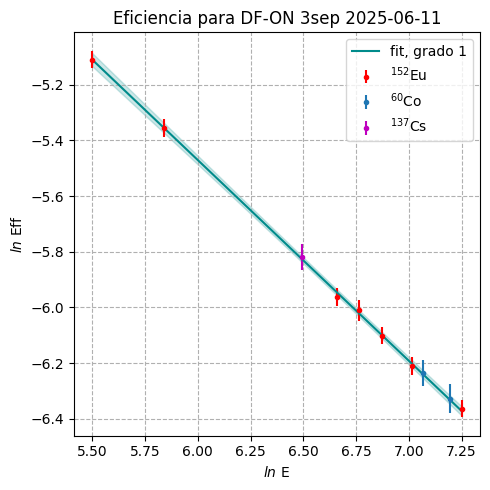

In [ ]:
plt.figure(1, figsize = (5,5))

plt.errorbar(np.log(Epeak_Eu[:-3]), np.log(eff_data[:-3]), yerr= err_eff[:-3]/eff_data[:-3], fmt='r.', label = '$^{152}$Eu')
plt.errorbar(np.log(Epeak_Eu[-2:]), np.log(eff_data[-2:]), yerr= err_eff[-2:]/eff_data[-2:], fmt='.', label = '$^{60}$Co')
plt.errorbar(np.log(Epeak_Eu[-3]), np.log(eff_data[-3]), yerr= err_eff[-3]/eff_data[-1], fmt='m.', label = '$^{137}$Cs')

plt.plot(logE_arr, eff_eval, 'darkcyan' , label = 'fit, grado {}'.format(grado_pol))
plt.fill_between(logE_arr, eff_eval-sigma_mu_est, eff_eval+sigma_mu_est, color='darkcyan', alpha=0.2)
plt.grid(True, ls = '--')
plt.ylabel('$ln$ Eff')
plt.xlabel('$ln$ E')
plt.legend()
plt.title('Eficiencia para ' + f'{det}'+ ' 3sep ' + f'{Fecha_cal.date()}')
plt.tight_layout()

In [ ]:
coef_tabla = np.vstack((coef, coef_err)).T
coef_tabla

array([[-0.72021827,  0.01917715],
       [-1.14959236,  0.12694148]])

In [ ]:
eff_data, err_eff

(array([0.00603711, 0.00472236, 0.00257234, 0.00245556, 0.00224097,
        0.00200742, 0.00172414, 0.0029663 , 0.00178641, 0.00195768]),
 array([1.91846620e-04, 1.47712397e-04, 8.27197278e-05, 9.22735670e-05,
        7.13592835e-05, 6.49690967e-05, 5.41984222e-05, 9.15019936e-05,
        9.13692450e-05, 9.13195313e-05]))

##Espectros de hojuelas MnCu

Sólo lo hago una vez, así me queda guardado:

In [ ]:
#Dicts que me van guardar la info de todos los alambres en cada corrida
cps_Alambres = {}
Act_Alambres = {}
dts = {}
tdead = {}

Empiezo iterando a partir de acá. Al finald el bloque anterior pueden encontrarse los coefs de eficiencia, y los




In [ ]:
#Composición del alambre
Composition = {'55Mn': 0.8123, '63Cu': 0.1877}

#Tiempo de irradiación total
tirr = 16200 + 696

#Defino la clase de alambre con sus métodos
Alambres = act.Alambre(Composition, tirr)

#Regiones de interés sacadas del espectro (GammaVision). El background es 3 puntos
ROIs = {'56Mn': [1494, 1508]}#, '64Cu': [885, 903]}

#Nombre del alambre y nro de medición
alambre = 'Mn209'
medno = 1

Tasa de fondo (cps_ROIs) en la ROI del pico de '56Mn' (*mat* en *ROIs*). Se lo agrega al dict de Fondos.

In [ ]:
#Obtengo info de los fondos en las ROIs de interés, y calculo sus tasas
Fondo_ROIs[alambre] = {iso: Fondo.ROI(ROIs[iso]) for iso in ROIs}
cps_ROIs = {mat:np.array([Fondo_ROIs[alambre][mat][xx] for xx in ['net', 'net_err']])/Fondo.tlive for mat in ROIs}

#Corresponde al tiempo de fin de la irradiación
t_inicio = datetime(2025, 6, 11, 14, 41, 36)

#función para el path del espectro del alambre (Chequear fecha. En general funciona a menos que el job haya arrancado al día siguiente)
path_job = lambda alambre, nro: f"/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_{alambre}_sep3_rON_{t_inicio.date().strftime('%d.%m.%Y')}_med{nro}.txt"


Inicio nuevos parámetros para iniciar el cálculo de tasas del alambre.

In [ ]:
#Arrays con ceros para a tasa y actividad del alambre
id_med = [mat+f'_med{medno}' for mat in ROIs]
cps_Alambres[alambre] = {id:np.zeros(2) for id in id_med}
Act_Alambres[alambre] = {id:np.zeros(2) for id in id_med}

#Obtengo el espectro del alambre
data = act.fromspec(path_job(alambre, medno), spec_cal.coef_en[::-1])

#Intervalo desde que se dejó de irradiar hasta que se empezó a medir (td o tdelay)
dt = (data.tinicio - t_inicio).total_seconds()

#Señalo las regiones de interés en channels
idx = np.array(list(ROIs.values())).reshape(-1)
idx_roiMn = np.logical_and(data.channels> idx[0], data.channels<idx[1])

##Si se quiere agregar el del Cu:
#idx_roiCu = np.logical_and(data.channels> idx[2], data.channels< idx[3])

Grafico el espectro cerca del pico de interés.

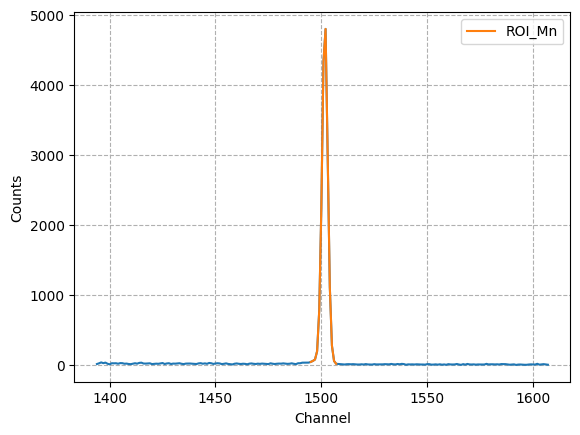

In [ ]:
#Figuras de espectros destacando las ROIs
plt.figure()
plt.plot(data.channels[min(idx)-100:max(idx)+100], data.counts[min(idx)-100:max(idx)+100])
plt.plot(data.channels[idx_roiMn], data.counts[idx_roiMn], label = 'ROI_Mn')
#plt.plot(data.channels[idx_roiCu], data.counts[idx_roiCu], label = 'ROI_Cu')
plt.grid(True, ls='--')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.legend()
#plt.yscale('log')

Cálculo a partir de las tasas y la eficiencia del HPGe.

In [ ]:
#Cálculo de actividad a partir de sus tasas
for mat, id in zip(ROIs, id_med):
  data_ROI = data.ROI(ROIs[mat])
  Net_cps, Err_cps = (data_ROI['net']/data.tlive - cps_ROIs[mat][0], np.sqrt((data_ROI['net_err']/data.tlive)**2 + cps_ROIs[mat][1]**2))
  cps_Alambres[alambre][id] = [Net_cps, Err_cps]
  Act_Alambres[alambre][id] = Alambres.Act_alambre(mat, np.array([data_ROI['en_max']]), np.array([Net_cps]), Err_cps, dt, data.treal, coef_tabla, rhos[0][0])[0]

#También me guardo el td para cada medición, así como el tiempo muerto en porcentaje.
dts[alambre] = dt
tdead[alambre] = 100*(1 - data.tlive/data.treal)

Actividad para este alambre:

In [ ]:
Act_Alambres

{'Mn209': {'56Mn_med1': array([76509.08196078,  1051.78368243])}}

#XC-OFF (Mn209/1 y Mn209/2)

In [ ]:
det = 'XC-OFF'

## Fondo
Cargo el espectro del fondo correspondiente en '.txt'. Elijo con *det*.

In [ ]:
Fondo = act.fromspec(path_fondo[det])

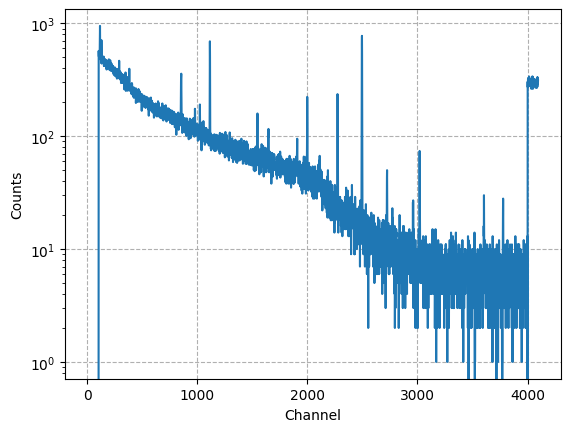

In [ ]:
plt.figure()
plt.plot(Fondo.channels, Fondo.counts)
plt.grid(True, ls='--')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.yscale('log')

## Eficiencia

Defino las direcciones para los espectros de Eu y las tablas con las ROIs.

In [ ]:
ROIs_cal = np.loadtxt(path_Roical[det]) #llamo a las ROIs definidas
spec_cal = act.fromspec(path_Eu152[det]) #recupero el espectro

In [ ]:
Fecha_cal = datetime.strptime(path_Eu152[det][-14:-4], '%d.%m.%Y') #día de la calibración. Puede definirse a mano, o cambiarse el formato de la fecha.
datos_cal = act.NAA_calib(Fuente_pat, Fecha_cal) #datos de la fuente pat - actividad, hl, espectro gamma (energy, intensity, unc_int)

Epeak_Eu = ROIs_cal[:, 0]
ROIs_cal = ROIs_cal[:, 1:].astype(int)

### Ajuste a curva de eficiencia

In [ ]:
grado_pol = 1 #grado de polinomio

eff_fit = datos_cal.cal_eff(ROIs_cal, spec_cal, Fondo, grado_pol, criterio = 0.003)

eff_data, err_eff, coef, coef_err, chi2, data_sel, residual, pvalor, ddof, rhos, var_mus = eff_fit #desglosamiento de resultados

coef_tabla = np.vstack((coef, coef_err)).T

Grafico los resultados

In [ ]:
E_arr = np.linspace(Epeak_Eu.min(), Epeak_Eu.max(), num=1000)
logE_arr  = np.log(E_arr)
eff_eval = np.polyval(coef, logE_arr) #eff evaluada con parámetros del ajuste
sigma_mu_est = np.sqrt(var_mus(logE_arr)) #raiz de la función varianza en función de ln(E)

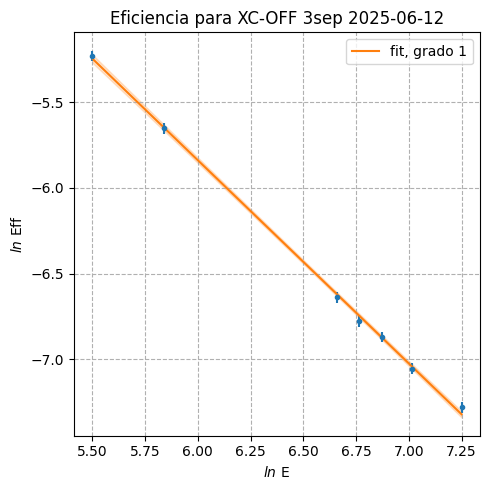

In [ ]:
plt.figure(1, figsize = (5,5))
plt.errorbar(np.log(Epeak_Eu), np.log(eff_data), yerr= err_eff/eff_data, fmt='.')
plt.plot(logE_arr, eff_eval, label = 'fit, grado {}'.format(grado_pol))
plt.fill_between(logE_arr, eff_eval-sigma_mu_est, eff_eval+sigma_mu_est, color='tab:orange', alpha=0.2)
plt.grid(True, ls = '--')
plt.ylabel('$ln$ Eff')
plt.xlabel('$ln$ E')
plt.legend()
plt.title('Eficiencia para ' + f'{det}'+ ' 3sep ' + f'{Fecha_cal.date()}')
plt.tight_layout()

### Reporte Eficiencia

In [ ]:
for jj in range(len(coef)):
    print(f'a{grado_pol-jj} = '+ ' '.join([*act.redondeo(coef[jj], coef_err[jj], 2, texto=True)]))
print(f'χ2 = {chi2}, ddof = {ddof}, p-value = {pvalor}.')#' \n Válido en E = ({Epeak_Eu.min().round(2)}-{Epeak_Eu.max().round(2)}) keV')

a1 = -1.187 ± 0.020
a0 = 1.28 ± 0.13
χ2 = 3.281414847854652, ddof = 5, p-value = 0.6566882398021794.


##Picos incógnita

###137Cs

Defino la **fuente incógnita** a considerar.

In [ ]:
iso = '137Cs'

Defino la fuente como un **alambre de composición 100% del radioisótopo**. Esto es para que sea una variable con las mismas funciones definidas (métodos) que las de un alambre.

In [ ]:
Comp_incog = {iso: 1}
Incog = act.Alambre(Comp_incog, 0)

Datos y **Tasa de Fondo** en la ROI del pico de interés.

In [ ]:
ROIs = ROIs_Cs[det]
Fondo_ROIs = {iso:Fondo.ROI(ROIs)}
cps_Fondo = {iso:np.array([Fondo_ROIs[iso][xx] for xx in ['net', 'net_err']])/Fondo.tlive}

**Espectro de la incógnita**, y datos en la ROI antes definida.

In [ ]:
spec_incog = act.fromspec(path_incog[det], coef_en = spec_cal.coef_en[::-1])
pico_incog = spec_incog.ROI(ROIs)
E_incog = pico_incog['en_max'] #energía del pico
t_inicio = spec_incog.tinicio.replace(hour=0, minute=0, second=0, microsecond=0) #Fecha de espectro '00 hs'

**Tasa neta de**l pico **incógnita** en la ROI.

In [ ]:
cps_pico = np.array([pico_incog['net'], pico_incog['net_err']])/spec_incog.tlive - cps_Fondo[iso]

Actividad calculada, actividad reportada, y la **diferencia relativa porcentual**.

In [ ]:
Act_incog, Act_RA3, diff, BR_incog = act.Actividad(np.array([E_incog]), np.array([cps_pico[0]]), np.array([cps_pico[1]]),
                          spec_incog.treal, coef_tabla, isfromRA3=True, Fuente=fuente[det], dt = t_inicio,
                          var_mu = var_mus)

####Resultados

In [ ]:
print(f' Act calc = {Act_incog[0][0].round(-2)}±{Act_incog[0][1].round(-2)} Bq\n Act reportada = {Act_RA3[0].round(-2)}±{Act_RA3[1].round(-2)} Bq\n diff = {diff[0].round(2)}%')

 Act calc = 25400.0±300.0 Bq
 Act reportada = 25300.0±800.0 Bq
 diff = 0.39%


In [ ]:
ROIs_Co[det]

array([[1993, 2007],
       [2268, 2282]])

###60Co

Repito para la fuente de Co. Sé que son 2 picos, por eso range(2).

In [ ]:
iso_Co = '60Co'
fuente_Co = 'Co60_76057-440'

Incog_Co = act.Alambre({iso_Co: 1}, 0)

ROI_Co = ROIs_Co[det]
Fondo_ROIs[iso_Co] = [Fondo.ROI(roi) for roi in ROI_Co]
cps_Fondo[iso_Co] = [np.array([Fondo_ROIs[iso_Co][ii][xx] for xx in ['net', 'net_err']])/Fondo.tlive for ii in range(2)]

spec_incog_Co = act.fromspec(path_incog_Co[det], coef_en = spec_cal.coef_en[::-1])
pico_incog_Co = [spec_incog_Co.ROI(roi) for roi in ROI_Co]
E_incog_Co = [pico_incog_Co[ii]['en_max'] for ii in range(2)] #energía del pico


In [ ]:
np.array(E_incog_Co)

array([1172.76111022, 1332.51254108])

In [ ]:
cps_pico_Co = [np.array([pico_incog_Co[ii]['net'], pico_incog_Co[ii]['net_err']])/spec_incog_Co.tlive - cps_Fondo[iso_Co][ii] for ii in range(2)]
Act_incog_Co, Act_RA3_Co, diff_Co, BR_incog_Co = act.Actividad(np.array(E_incog_Co), np.array(cps_pico_Co)[:, 0], np.array(cps_pico_Co)[:, 1],
                          spec_incog_Co.treal, coef_tabla, isfromRA3=True, Fuente=fuente_Co, dt = spec_incog_Co.tinicio.replace(hour=0, minute=0, second=0, microsecond=0),
                          var_mu = var_mus)


In [ ]:
cps_pico_Co

[array([15.4862298 ,  0.06260272]), array([13.51852128,  0.05714882])]

####Resultados

In [ ]:
Act_incog_Co, Act_RA3_Co, diff_Co, BR_incog_Co

(array([[18908.45532111,   306.42708797],
        [19173.28541221,   343.86066812]]),
 array([18272.47148282,   548.17414448]),
 array([3.42014447, 4.81042316]),
 array([[1.173228e+03, 9.985000e-01, 3.000000e-04],
        [1.332492e+03, 9.998260e-01, 6.000000e-06]]))

##Agregar datos a la curva de eficiencia

A partir de *BR_incog*, *Act_RA3*, y *cps_pico*, puedo calcular nuevos valores de eficiencia, y sumarlos a *eff_data*.

In [ ]:
n_new = 3
eff_data = np.append(eff_data, np.zeros(n_new))
err_eff = np.append(err_eff, np.zeros(n_new))
Epeak_Eu = np.append(Epeak_Eu, np.zeros(n_new))

### 137Cs

In [ ]:
eff_incog = cps_pico[0]/(Act_RA3[0]*BR_incog[0][1])
eff_incog_err = eff_incog*np.sqrt(np.divide(*BR_incog[0][1:][::-1])**2 +
                                  np.divide(*cps_pico[::-1])**2 +
                                  np.divide(*Act_RA3[::-1])**2)

In [ ]:
eff_data[-3] = eff_incog
err_eff[-3] = eff_incog_err
Epeak_Eu[-3] = E_incog

###60Co

In [ ]:
cps_pico_Co = np.array(cps_pico_Co)

eff_data[-2:] = np.array(cps_pico_Co)[:, 0]/(Act_RA3_Co[0]*BR_incog_Co[:, 1])
err_eff[-2:] = eff_incog*np.sqrt((BR_incog_Co[:, 2]/BR_incog_Co[:, 1])**2 +
              (cps_pico_Co[:, 1]/cps_pico_Co[:, 0])**2 + np.divide(*Act_RA3[::-1])**2)
Epeak_Eu[-2:] = E_incog_Co

Repito el cálculo del ajuste, con estas nuevas series de datos.

In [ ]:
grado_pol = 1 #grado de polinomio

coef, coef_err, chi2, residual, pvalor, ddof, rhos, var_mus = act.ajuste_pol(grado_pol, np.log(Epeak_Eu), np.log(eff_data), err_eff/eff_data)

E_arr = np.linspace(Epeak_Eu.min(), Epeak_Eu.max(), num=1000)
logE_arr  = np.log(E_arr)
eff_eval = np.polyval(coef, logE_arr) #eff evaluada con parámetros del ajuste
sigma_mu_est = np.sqrt(var_mus(logE_arr)) #raiz de la función varianza en función de ln(E)

In [ ]:
for jj in range(len(coef)):
    print(f'a{grado_pol-jj} = '+ ' '.join([*act.redondeo(coef[jj], coef_err[jj], 3, texto=True)]))
print(f'χ2 = {chi2}, ddof = {ddof}, p-value = {pvalor}.')#' \n Válido en E = ({Epeak_Eu.min().round(2)}-{Epeak_Eu.max().round(2)}) keV')

a1 = -1.1822 ± 0.0190
a0 = 1.254 ± 0.126
χ2 = 3.9897587456767365, ddof = 8, p-value = 0.8580462776497138.


In [ ]:
print('χ2 red = ', chi2/ddof)

χ2 red =  0.49871984320959206


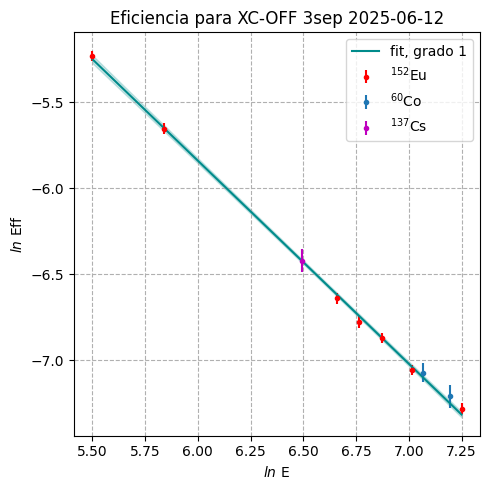

In [ ]:
plt.figure(1, figsize = (5,5))

plt.errorbar(np.log(Epeak_Eu[:-3]), np.log(eff_data[:-3]), yerr= err_eff[:-3]/eff_data[:-3], fmt='r.', label = '$^{152}$Eu')
plt.errorbar(np.log(Epeak_Eu[-2:]), np.log(eff_data[-2:]), yerr= err_eff[-2:]/eff_data[-2:], fmt='.', label = '$^{60}$Co')
plt.errorbar(np.log(Epeak_Eu[-3]), np.log(eff_data[-3]), yerr= err_eff[-3]/eff_data[-1], fmt='m.', label = '$^{137}$Cs')

plt.plot(logE_arr, eff_eval, 'darkcyan' , label = 'fit, grado {}'.format(grado_pol))
plt.fill_between(logE_arr, eff_eval-sigma_mu_est, eff_eval+sigma_mu_est, color='darkcyan', alpha=0.2)
plt.grid(True, ls = '--')
plt.ylabel('$ln$ Eff')
plt.xlabel('$ln$ E')
plt.legend()
plt.title('Eficiencia para ' + f'{det}'+ ' 3sep ' + f'{Fecha_cal.date()}')
plt.tight_layout()

In [ ]:
coef_tabla = np.vstack((coef, coef_err)).T
coef_tabla

array([[-1.18218793,  0.01904496],
       [ 1.25425229,  0.12568254]])

In [ ]:
eff_data, err_eff

(array([0.00535819, 0.0035099 , 0.00130789, 0.00114144, 0.00103678,
        0.00086166, 0.00068793, 0.00162549, 0.00084879, 0.00073996]),
 array([1.64535220e-04, 1.08878750e-04, 4.08842089e-05, 3.92106096e-05,
        3.21669832e-05, 2.70564795e-05, 2.12418135e-05, 4.93445304e-05,
        4.92079614e-05, 4.92465919e-05]))

##Espectros de hojuelas MnCu

Empiezo iterando a partir de acá. Al finald el bloque anterior pueden encontrarse los coefs de eficiencia, y los




In [ ]:
#Composición del alambre
Composition = {'55Mn': 0.8123, '63Cu': 0.1877}

#Tiempo de irradiación total
tirr = 16200 + 696

#Defino la clase de alambre con sus métodos
Alambres = act.Alambre(Composition, tirr)

#Regiones de interés sacadas del espectro (GammaVision). El background es 3 puntos
ROIs = {'56Mn': [1427, 1443]}#, '64Cu': [885, 903]}

#Nombre del alambre y nro de medición
alambre = 'Mn209'
medno = 2

Tasa de fondo (cps_ROIs) en la ROI del pico de '56Mn' (*mat* en *ROIs*). Se lo agrega al dict de Fondos.

In [ ]:
#Obtengo info de los fondos en las ROIs de interés, y calculo sus tasas
Fondo_ROIs[alambre] = {iso: Fondo.ROI(ROIs[iso]) for iso in ROIs}
cps_ROIs = {mat:np.array([Fondo_ROIs[alambre][mat][xx] for xx in ['net', 'net_err']])/Fondo.tlive for mat in ROIs}

#Corresponde al tiempo de fin de la irradiación
t_inicio = datetime(2025, 6, 11, 14, 41, 36)

#función para el path del espectro del alambre (Chequear fecha. En general funciona a menos que el job haya arrancado al día siguiente)
path_job = lambda alambre, nro: f"/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_{alambre}_3sep_rOFF_12.06.2025_med{nro}.txt"


Inicio nuevos parámetros para iniciar el cálculo de tasas del alambre.

In [ ]:
#Nueva etiqueta para las mediciones de XC-OFF
id_med = [mat+f'_med{medno}' for mat in ROIs]

#Obtengo el espectro del alambre
data = act.fromspec(path_job(alambre, medno), spec_cal.coef_en[::-1])

#Intervalo desde que se dejó de irradiar hasta que se empezó a medir (td o tdelay)
dt = (data.tinicio - t_inicio).total_seconds()

#Señalo las regiones de interés en channels
idx = np.array(list(ROIs.values())).reshape(-1)
idx_roiMn = np.logical_and(data.channels> idx[0], data.channels<idx[1])

##Si se quiere agregar el del Cu:
#idx_roiCu = np.logical_and(data.channels> idx[2], data.channels< idx[3])

Grafico el espectro cerca del pico de interés.

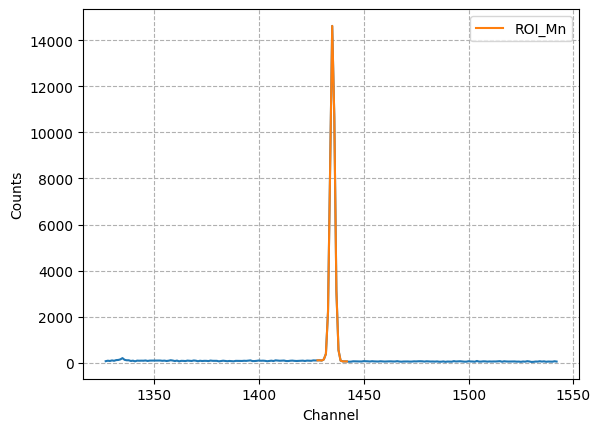

In [ ]:
#Figuras de espectros destacando las ROIs
plt.figure()
plt.plot(data.channels[min(idx)-100:max(idx)+100], data.counts[min(idx)-100:max(idx)+100])
plt.plot(data.channels[idx_roiMn], data.counts[idx_roiMn], label = 'ROI_Mn')
#plt.plot(data.channels[idx_roiCu], data.counts[idx_roiCu], label = 'ROI_Cu')
plt.grid(True, ls='--')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.legend()
#plt.yscale('log')

Cálculo a partir de las tasas y la eficiencia del HPGe.

In [ ]:
#Cálculo de actividad a partir de sus tasas
for mat, id in zip(ROIs, id_med):
  data_ROI = data.ROI(ROIs[mat])
  Net_cps, Err_cps = (data_ROI['net']/data.tlive - cps_ROIs[mat][0], np.sqrt((data_ROI['net_err']/data.tlive)**2 + cps_ROIs[mat][1]**2))
  cps_Alambres[alambre][id] = [Net_cps, Err_cps]
  Act_Alambres[alambre][id] = Alambres.Act_alambre(mat, np.array([data_ROI['en_max']]), np.array([Net_cps]), Err_cps, dt, data.treal, coef_tabla, rhos[0][0])[0]

#También me guardo el td para cada medición, así como el tiempo muerto en porcentaje.
dts[alambre] = dt
tdead[alambre] = 100*(1 - data.tlive/data.treal)

In [ ]:
Act_Alambres

{'Mn209': {'56Mn_med1': array([76509.08196078,  1051.78368243]),
  '56Mn_med2': array([78516.44758794,   970.03357247])}}

## Todas las Eff. juntas

En cada iteración, para los distintos *det*, me anoto los coeficientes que devuelve, junto con los datos para ajustar. Esto último resultará útil para volver a obtener la función *var_mu*, para propagar errores.

In [ ]:
data_all = {'XC-OFF': np.array([[0.00535819, 0.0035099 , 0.00130789, 0.00114144, 0.00103678,
       0.00086166, 0.00068793, 0.00162549, 0.00084879, 0.00073996], [1.64535220e-04, 1.08878750e-04, 4.08842089e-05, 3.92106096e-05,
       3.21669832e-05, 2.70564795e-05, 2.12418135e-05, 4.93445304e-05,
       4.92079614e-05, 4.92465919e-05]]).T,
            'XC-ON': np.array([[0.00534794, 0.00351262, 0.00130545, 0.00113286, 0.00102448,
        0.00087893, 0.00068957, 0.00160198, 0.00084564, 0.00073355], [1.65666521e-04, 1.09283381e-04, 4.14880987e-05, 4.15274852e-05,
        3.24040914e-05, 2.82822615e-05, 2.16697848e-05, 4.99017641e-05,
        5.03679057e-05, 5.05801497e-05]]).T,
            'DF-ON': np.array([[0.00603711, 0.00472236, 0.00257234, 0.00245556, 0.00224097,
        0.00200742, 0.00172414, 0.0029663 , 0.00178641, 0.00195768], [1.91846620e-04, 1.47712397e-04, 8.27197278e-05, 9.22735670e-05,
        7.13592835e-05, 6.49690967e-05, 5.41984222e-05, 9.15019936e-05,
        9.13692450e-05, 9.13195313e-05]]).T}

In [ ]:
coef_all = {'XC-OFF': np.array([[-1.18218793,  0.01904496], [ 1.25425229,  0.12568254]]),
            'XC-ON': np.array([[-1.1798183 ,  0.01928542], [ 1.2369473 ,  0.12712041]]),
            'DF-ON': np.array([[-0.72021827,  0.01917715], [-1.14959236,  0.12694148]])}
